## **Ejercicios de histogramas y boxplots (Core)**
Análisis de Distribución y Desviaciones Usando Histogramas y Boxplots



**Descripción del Ejercicio**

En esta actividad, utilizaremos el dataset «World Happiness Report» de Kaggle, que contiene información sobre la felicidad en diferentes países del mundo. Este dataset incluye variables como el puntaje de felicidad, el PIB per cápita, la expectativa de vida saludable, la libertad, la generosidad, entre otras.

Puedes descargar el dataset desde el siguiente enlace: World Happiness Report.

### **Instrucciones**

#### **1. Cargar y Explorar los Datos**

* Descarga el dataset y cárgalo en un DataFrame de Pandas.
* Realiza una exploración inicial de los datos para entender las variables disponibles.

In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset
path = ('../data/2019.csv')
df = pd.read_csv(path)

In [2]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### **Limpieza de datos con Python**

##### **Deteccion y eliminacion de valores duplicados**

In [17]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


##### **Verificación y ajuste de tipos de datos** 

In [18]:
# Verificamos la informacion de dataframe
df.info()

# Tipos de datos son correctos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [19]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### **Consistencia en valores categóricos**

In [14]:
# Verificamos los valores unicos
list(df['Country or region'].unique())


['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria',
 'Australia',
 'Costa Rica',
 'Israel',
 'Luxembourg',
 'United Kingdom',
 'Ireland',
 'Germany',
 'Belgium',
 'United States',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'France',
 'Taiwan',
 'Chile',
 'Guatemala',
 'Saudi Arabia',
 'Qatar',
 'Spain',
 'Panama',
 'Brazil',
 'Uruguay',
 'Singapore',
 'El Salvador',
 'Italy',
 'Bahrain',
 'Slovakia',
 'Trinidad & Tobago',
 'Poland',
 'Uzbekistan',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Nicaragua',
 'Kosovo',
 'Argentina',
 'Romania',
 'Cyprus',
 'Ecuador',
 'Kuwait',
 'Thailand',
 'Latvia',
 'South Korea',
 'Estonia',
 'Jamaica',
 'Mauritius',
 'Japan',
 'Honduras',
 'Kazakhstan',
 'Bolivia',
 'Hungary',
 'Paraguay',
 'Northern Cyprus',
 'Peru',
 'Portugal',
 'Pakistan',
 'Russia',
 'Philippines',
 'Serbia',
 'Moldova',
 'Libya',
 'Montenegro',
 'Tajikistan',
 'Croatia',
 'Hong Kong',

In [15]:
# Verificamos la cantidad de valores unicos
df['Country or region'].nunique()

156

#### **Manejo de valores nulos, anomalos**

##### **Valores Nulos**

In [16]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Overall rank,156,0,0.0
Country or region,156,0,0.0
Score,156,0,0.0
GDP per capita,156,0,0.0
Social support,156,0,0.0
Healthy life expectancy,156,0,0.0
Freedom to make life choices,156,0,0.0
Generosity,156,0,0.0
Perceptions of corruption,156,0,0.0


##### **Valores anomalos para columnas numericas**

In [27]:
# Verificamos la estadística descriptiva para detectar valores atipicos
df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### **2. Crear Histogramas**

* Crea histogramas para las variables Score, GDP per capita, Healthy life expectancy y Freedom to make life choices.
* Personaliza los histogramas con colores, bordes y ajustes de transparencia

#### **Creamos un histograma**

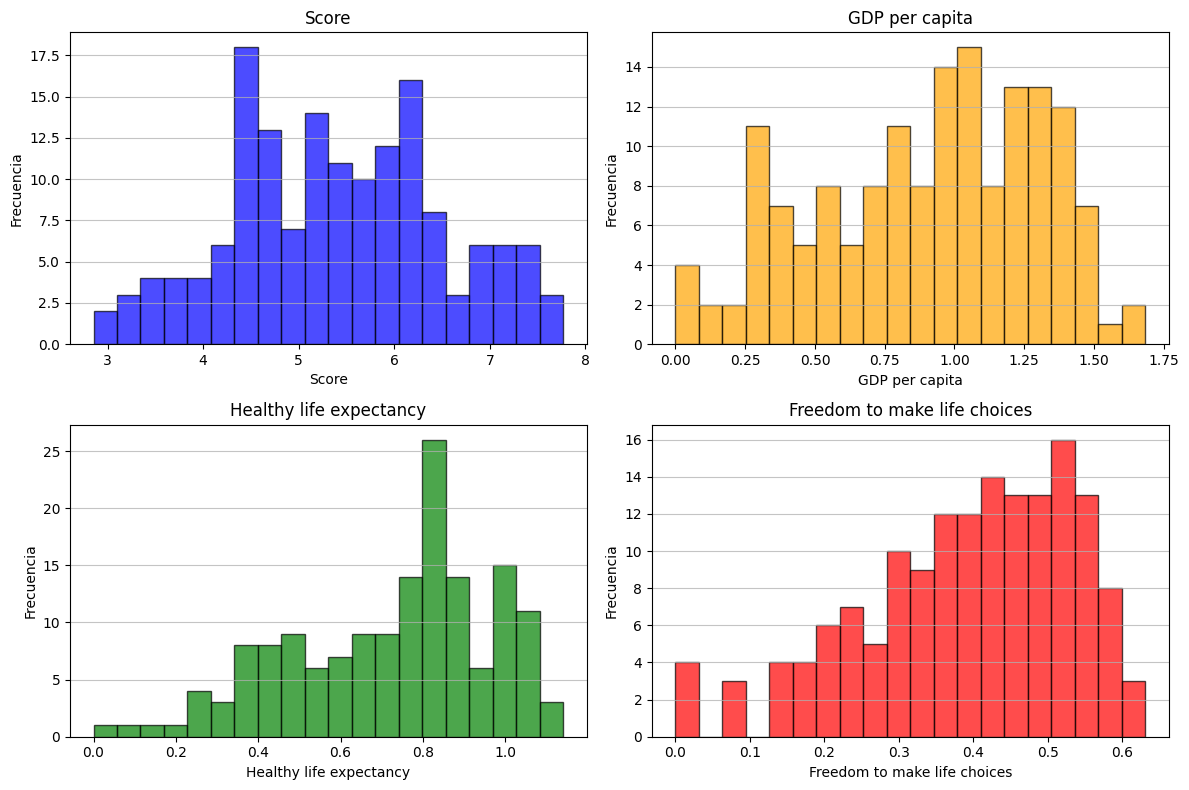

In [30]:
# Define las variables para los histogramas
variables = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']

 # Color de las barras
colors = ['blue', 'orange', 'green', 'red'] 
# Color de los bordes
edges = ['black', 'black', 'black', 'black']  

# Ajuste de transparencia
alpha = 0.7  

# Configuración de la figura
plt.figure(figsize=(12, 8))

# Creamos un histogramas para cada variable usando un loop
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)  
    plt.hist(df[var], color=colors[i], edgecolor=edges[i], alpha=alpha, bins=20)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)  


plt.tight_layout()
plt.show()


### **3. Crear Boxplots**

* Crea boxplots para las mismas variables para visualizar la mediana, el rango intercuartil y los valores atípicos.
* Personaliza los boxplots con diferentes colores y estilos.

#### **Creamos un Boxplot**

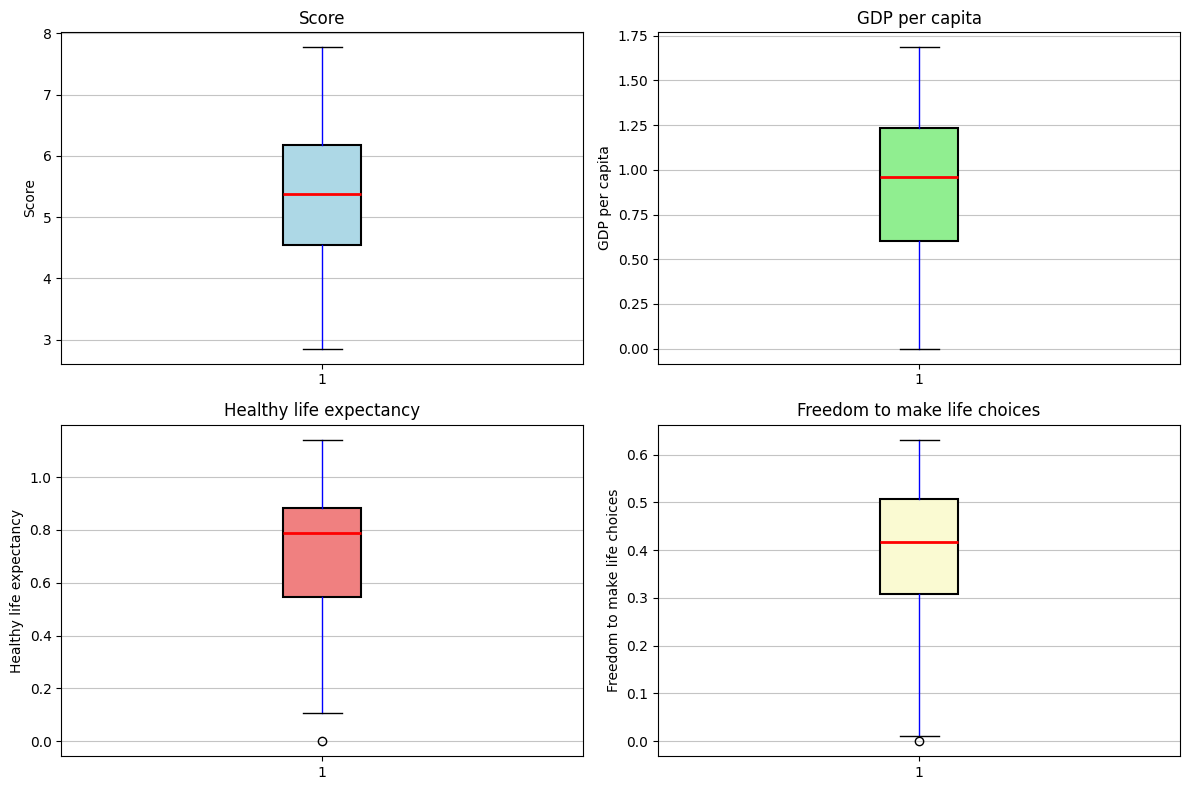

In [40]:
# Asignacion de variables
variables = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']
# Colores personalizados
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'] 
# Propiedades del boxplot 
boxprops = {'color': 'black', 'linewidth': 1.5} 
# Propiedades de la mediana
medianprops = {'color': 'red', 'linewidth': 2}  
# Propiedades de las "whiskers" (bigotes)
whiskerprops = {'color': 'blue', 'linewidth': 1}  
# Configuración de la figura
plt.figure(figsize=(12, 8))

# Crear boxplots para cada variable con un loop
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)  
    box = plt.boxplot(df[var], 
                boxprops=boxprops, 
                medianprops=medianprops, 
                whiskerprops=whiskerprops, 
                patch_artist=True)
    # Asignar colores
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])

    plt.title(var)
    plt.ylabel(var)
    plt.grid(axis='y', alpha=0.75)  

plt.tight_layout()
plt.show()

### **Análisis Combinado**

* Combina los histogramas y los boxplots en una sola figura para cada variable.
* Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos.

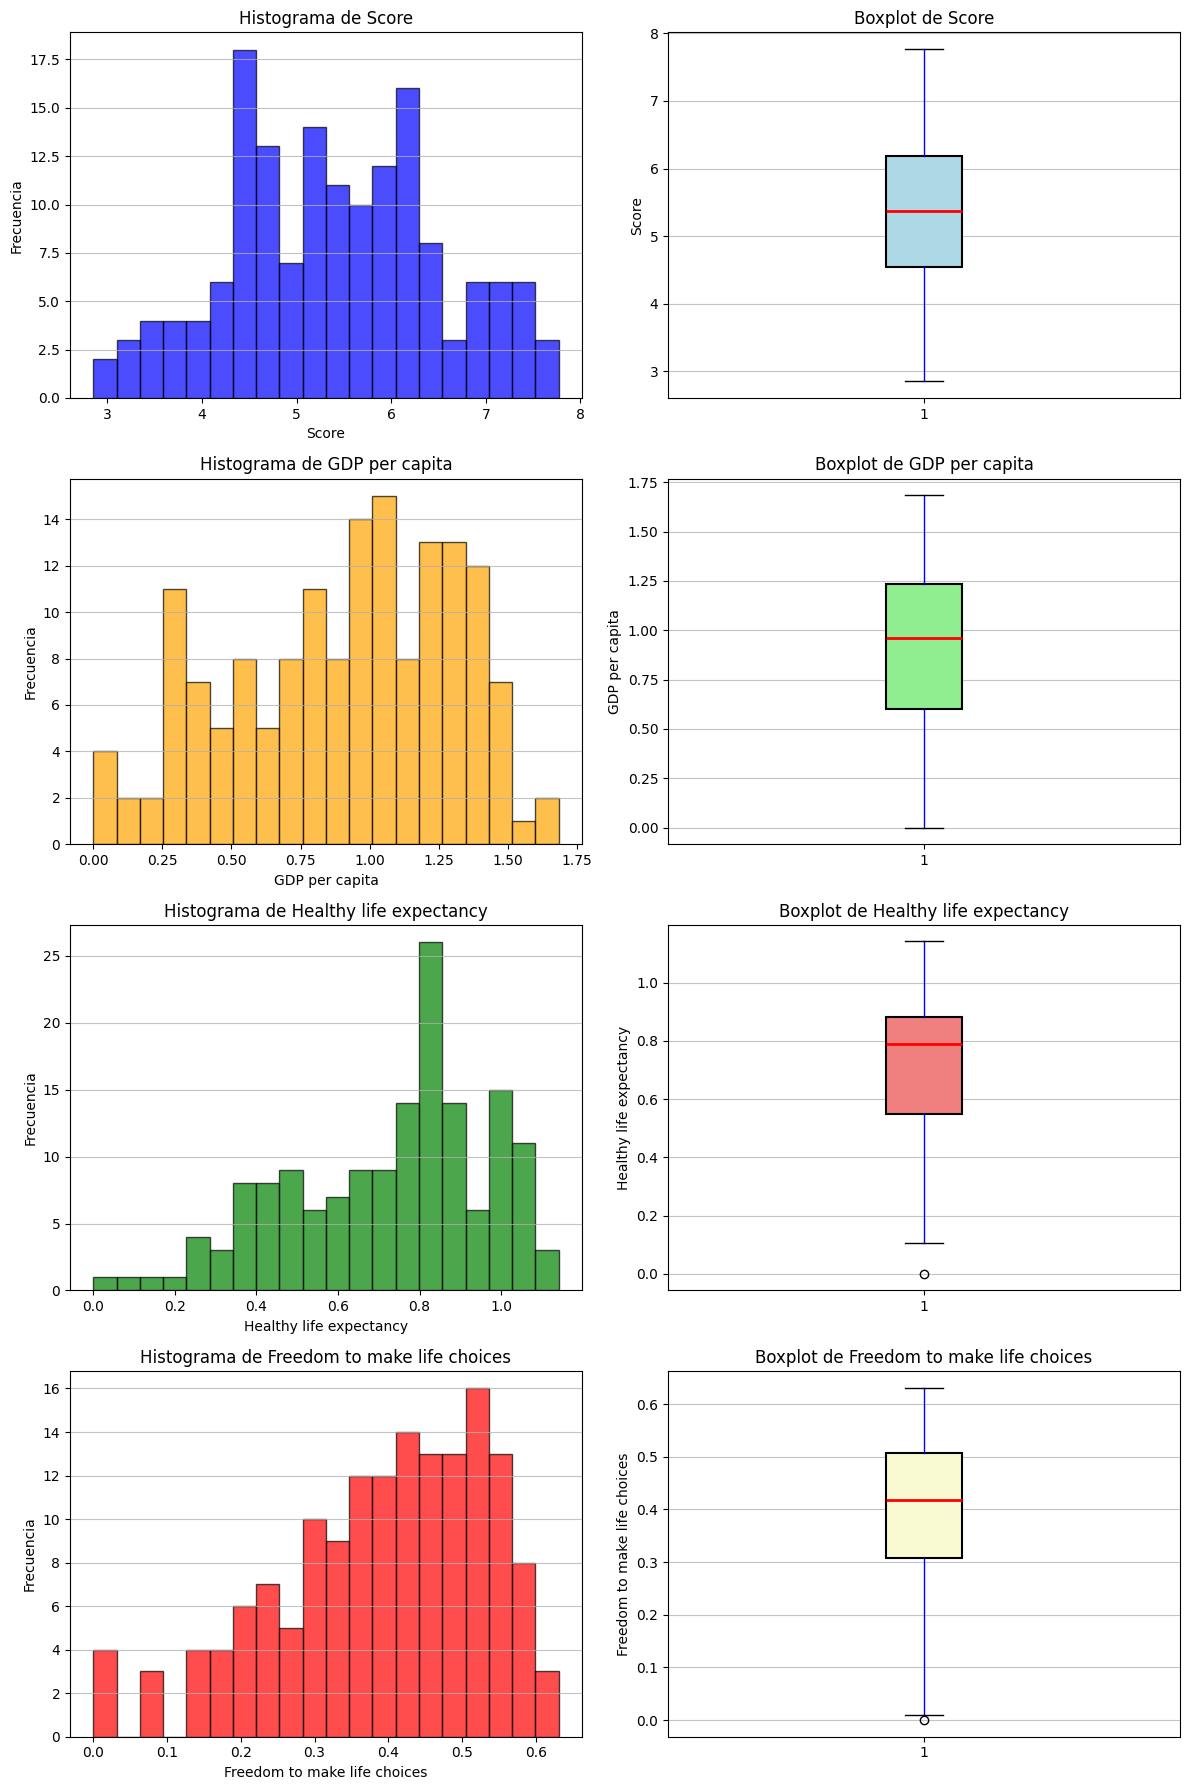

In [42]:
# Define las variables para los histogramas y boxplots
variables = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']
# Colores para boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']
# Colores para histogramas
hist_colors = ['blue', 'orange', 'green', 'red']  
# Configuración de la figura
fig, axs = plt.subplots(4, 2, figsize=(12, 18))  

# Creamos histogramas y boxplots para cada variable con un loop
for i, var in enumerate(variables):
    # Histograma
    axs[i, 0].hist(df[var], color=hist_colors[i], edgecolor='black', alpha=0.7, bins=20)
    axs[i, 0].set_title(f'Histograma de {var}')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frecuencia')
    axs[i, 0].grid(axis='y', alpha=0.75)  

    # Boxplot
    box = axs[i, 1].boxplot(df[var], 
                            boxprops={'color': 'black', 'linewidth': 1.5}, 
                            medianprops={'color': 'red', 'linewidth': 2}, 
                            whiskerprops={'color': 'blue', 'linewidth': 1}, 
                            patch_artist=True)  

    # Asigna el color al boxplot
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    
    axs[i, 1].set_title(f'Boxplot de {var}')
    axs[i, 1].set_ylabel(var)
    axs[i, 1].grid(axis='y', alpha=0.75)  

plt.tight_layout()
plt.show()